Name: Deven Patel

Id: 202101264

Problem: Binary Classification of Hearing, 1(normal) and 2(abnormal)

In [1]:
from zipfile import ZipFile 
  

with ZipFile('smoking_driking_dataset_Ver01.csv.zip', 'r') as zObject: 
    zObject.extractall() 

***Exploratory Data Analysis (EDA)***
---

In [2]:
import math
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
df.shape

(991346, 24)

In [4]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [5]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [6]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [7]:

for column in df:
    print(f'{column}: {df[column].unique()}')



sex: ['Male' 'Female']
age: [35 30 40 50 45 55 65 25 60 20 70 75 80 85]
height: [170 180 165 175 150 155 160 145 140 185 135 190 130]
weight: [ 75  80  60  55  65  50  85  70  45  40  95 120  90  35 105 100 110 115
 130  30 125 140  25 135]
waistline: [ 90.   89.   91.   80.   75.   69.   84.2  84.   82.   79.2  98.   72.3
  88.   76.   73.   78.   99.   85.   67.   62.   92.   79.   87.   70.
  67.5  87.3  71.   92.9  94.   79.3  77.   75.7  85.5  74.   60.   81.
  72.   65.   63.   81.6  83.   61.  110.   86.8  73.5  93.  109.   54.
  91.2  66.   79.5  86.   97.1  76.2  80.5  68.   64.   74.1  85.9  65.3
  95.   94.5 100.   85.4  77.6  73.3 103.   93.5  67.8  69.2 105.7 105.
  74.2  97.   75.4  83.2  88.5  85.3  87.4  71.5  64.1  76.6  93.1  84.8
  88.1  66.8  96.   81.5  80.1  87.2  86.5 104.  114.   56.   88.8  89.2
  66.2  90.8  88.2  82.5  65.4  72.2  81.3  75.6  87.8  77.2  98.5  85.2
  97.5  63.5  95.4  72.6 110.8  81.2  87.5  89.5  82.4  81.8  76.5  87.1
  78.1  72.7  84.3 101

In [8]:
df['hearing'] = df.apply(lambda x: 1 if x['hear_left']==1 and x['hear_right']==1 else 2,axis=1)
df.shape

(991346, 25)

Here, in our dataset, there are two columns: hear left and hear right, with values as 1(normal) and 2(abnormal). Now, I have changed these both columns into one column, such that if both left and right hearing is normal, the overall hearing of person is normal, otherwise it is abnormal. I have dropped both hear left and hear right column.

From now on, I will work with respect to this hearing column.

In [9]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,hearing
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,1
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,1
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,1
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,1


In [10]:
df = df.drop(['hear_left','hear_right'],axis=1)

In [11]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,hearing
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,122.432498,76.052627,100.424447,195.557020,...,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,1.044892
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,14.543148,9.889365,24.179960,38.660155,...,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,0.207068
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,67.000000,32.000000,25.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,273.000000,185.000000,852.000000,2344.000000,...,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,2.000000


In [12]:
categorical_columns=['sex','DRK_YN','urine_protein','SMK_stat_type_cd','hearing']

numerical_columns = [col for col in df.columns if col not in categorical_columns]

In [13]:
numerical_columns

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP']

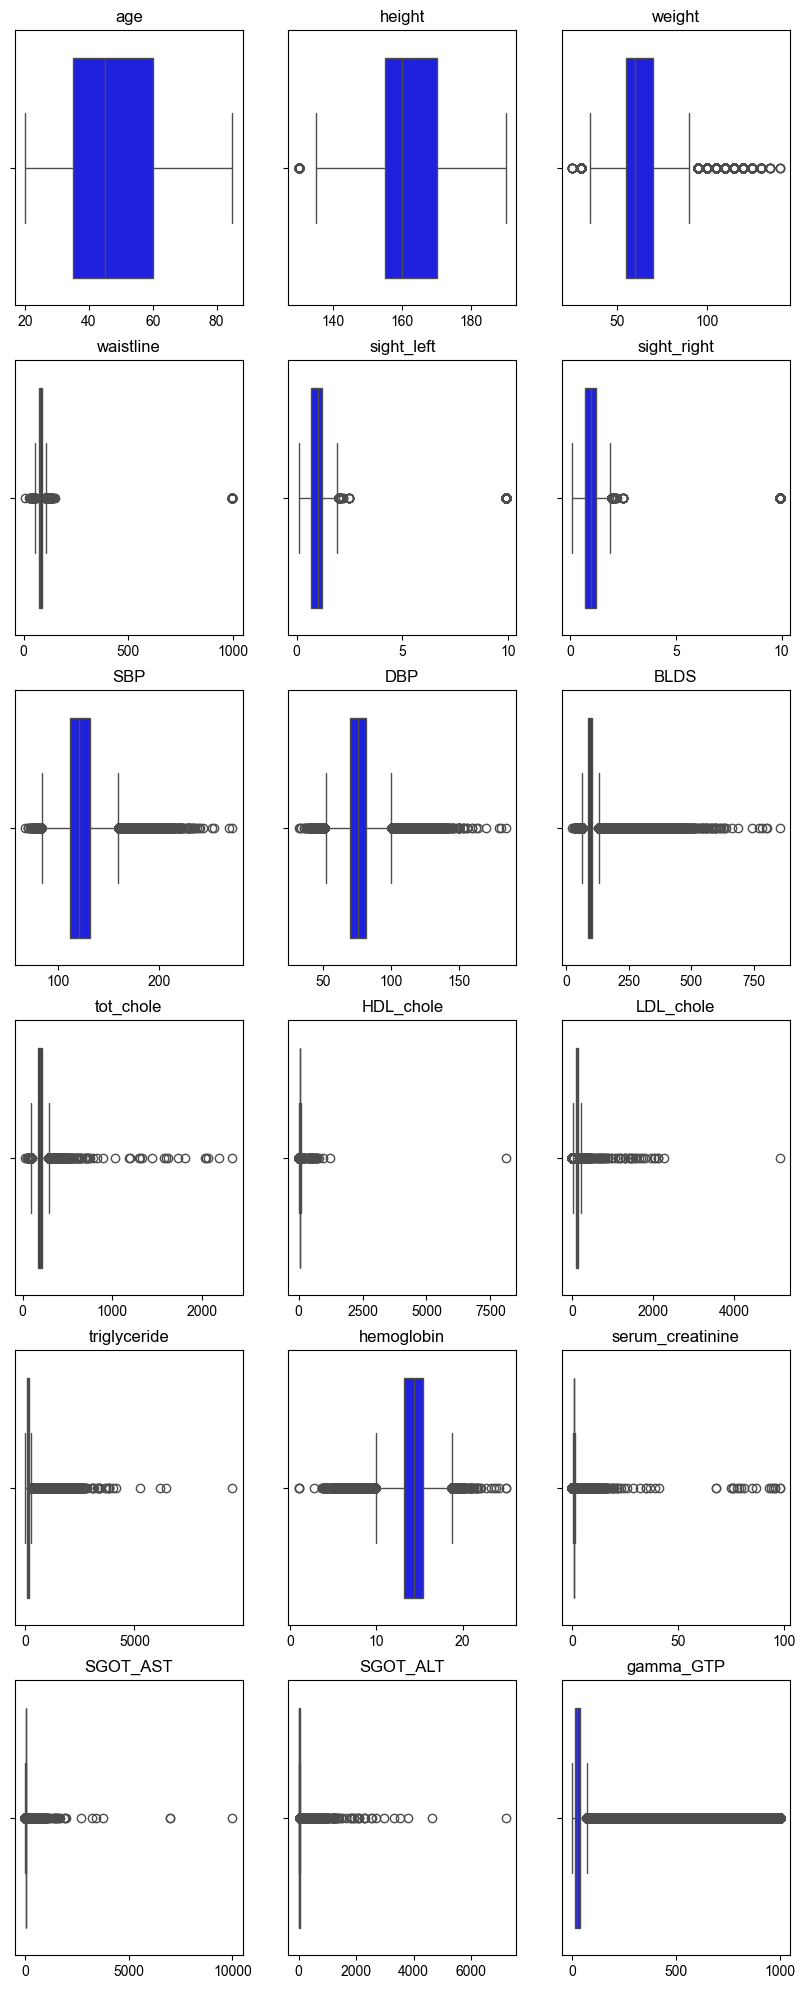

In [14]:
fig, ax=plt.subplots(6,3,figsize=(10,25))
sns.set_theme(style="whitegrid")
count=0
for axid, col in enumerate(numerical_columns):
    
    sns.boxplot(x=df[col],ax = ax[count,axid%3],color='blue')
    ax[count,axid%3].set_title(col)
    ax[count,axid%3].set_xlabel('')
    if axid%3==2:
        count = count+1

From the box plots given above, we can see the outliers for each numerical column, so that we can remove it in pre-processing.

In hearing column, 2 is considered as outlier, but its just 2 values 1 and 2, which we want to predict.

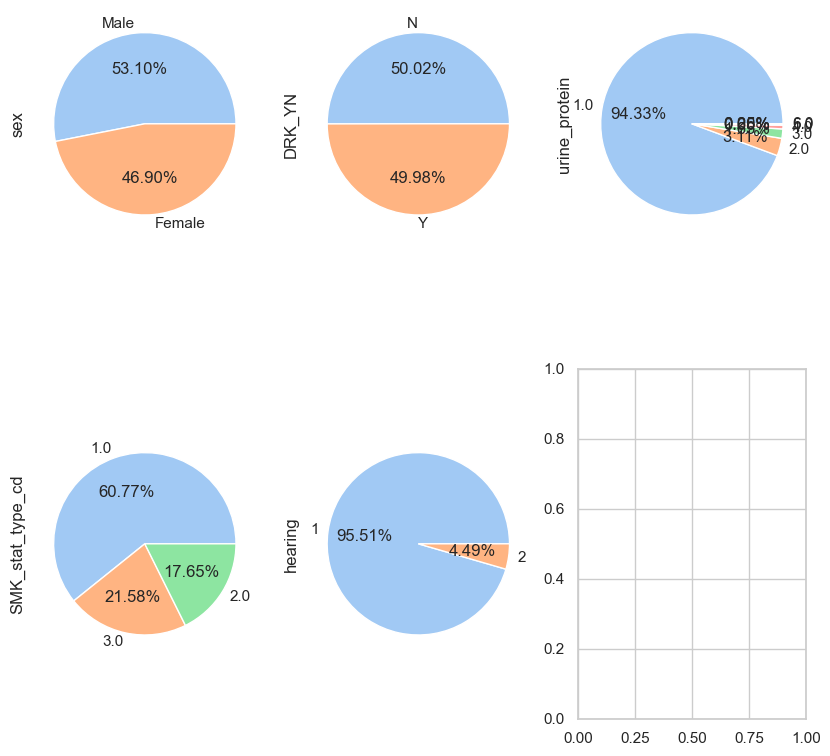

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
count=0

for axid, col in enumerate(categorical_columns):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[count,axid%3],label=col)
    if axid%3==2:
        count = count+1

From the pie charts, it is seen that both the sex and DRK_YN are equally distributed columns.

<Axes: >

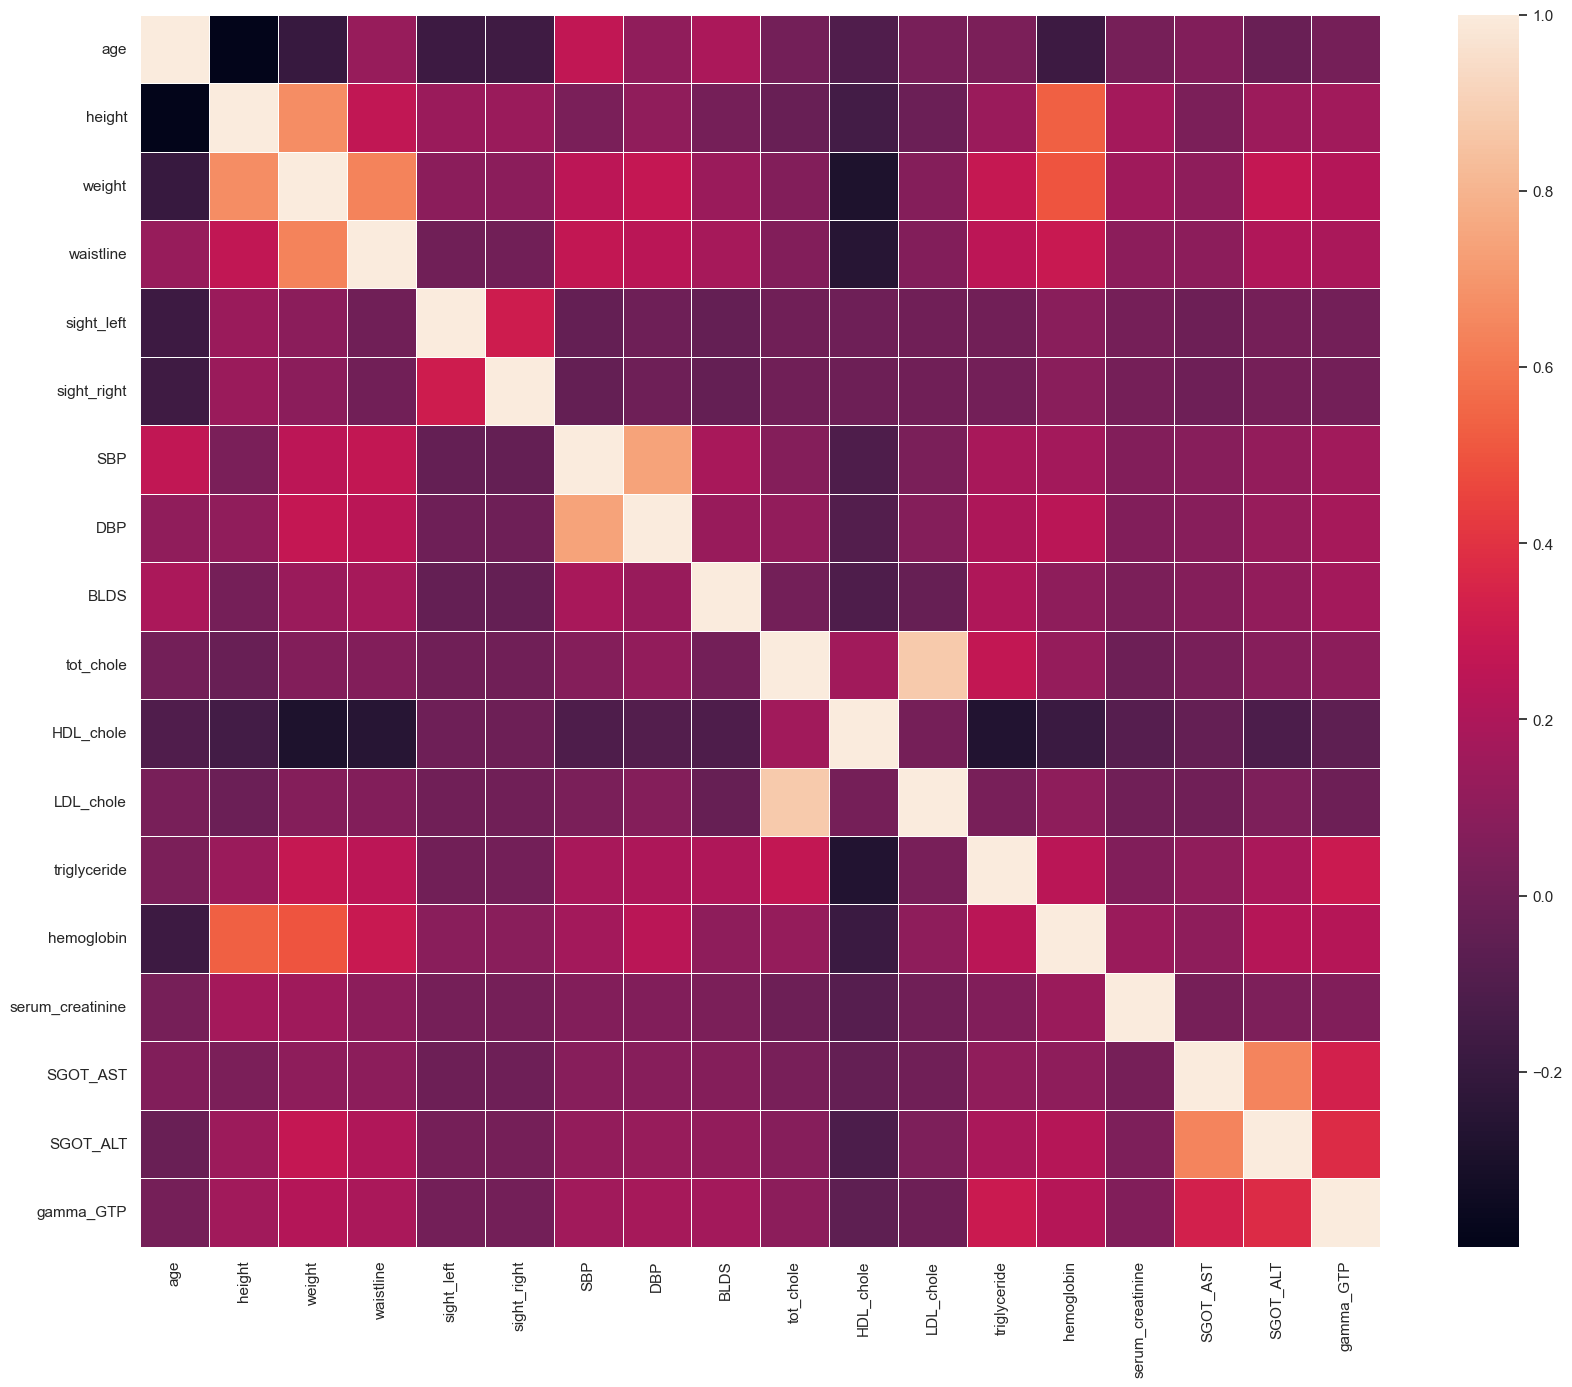

In [16]:
plt.figure(figsize=(20, 16))
sns.heatmap(df[numerical_columns].corr(), linewidths=0.6)

From the heatmap, it is seen that there is no direct or nearer correlation between hearing and any other columns. The 2 significant correlations observed are between SGOT_AST and SGOT_ALT, and LDL_chloe and tot_chloe, and DBP and SBP.

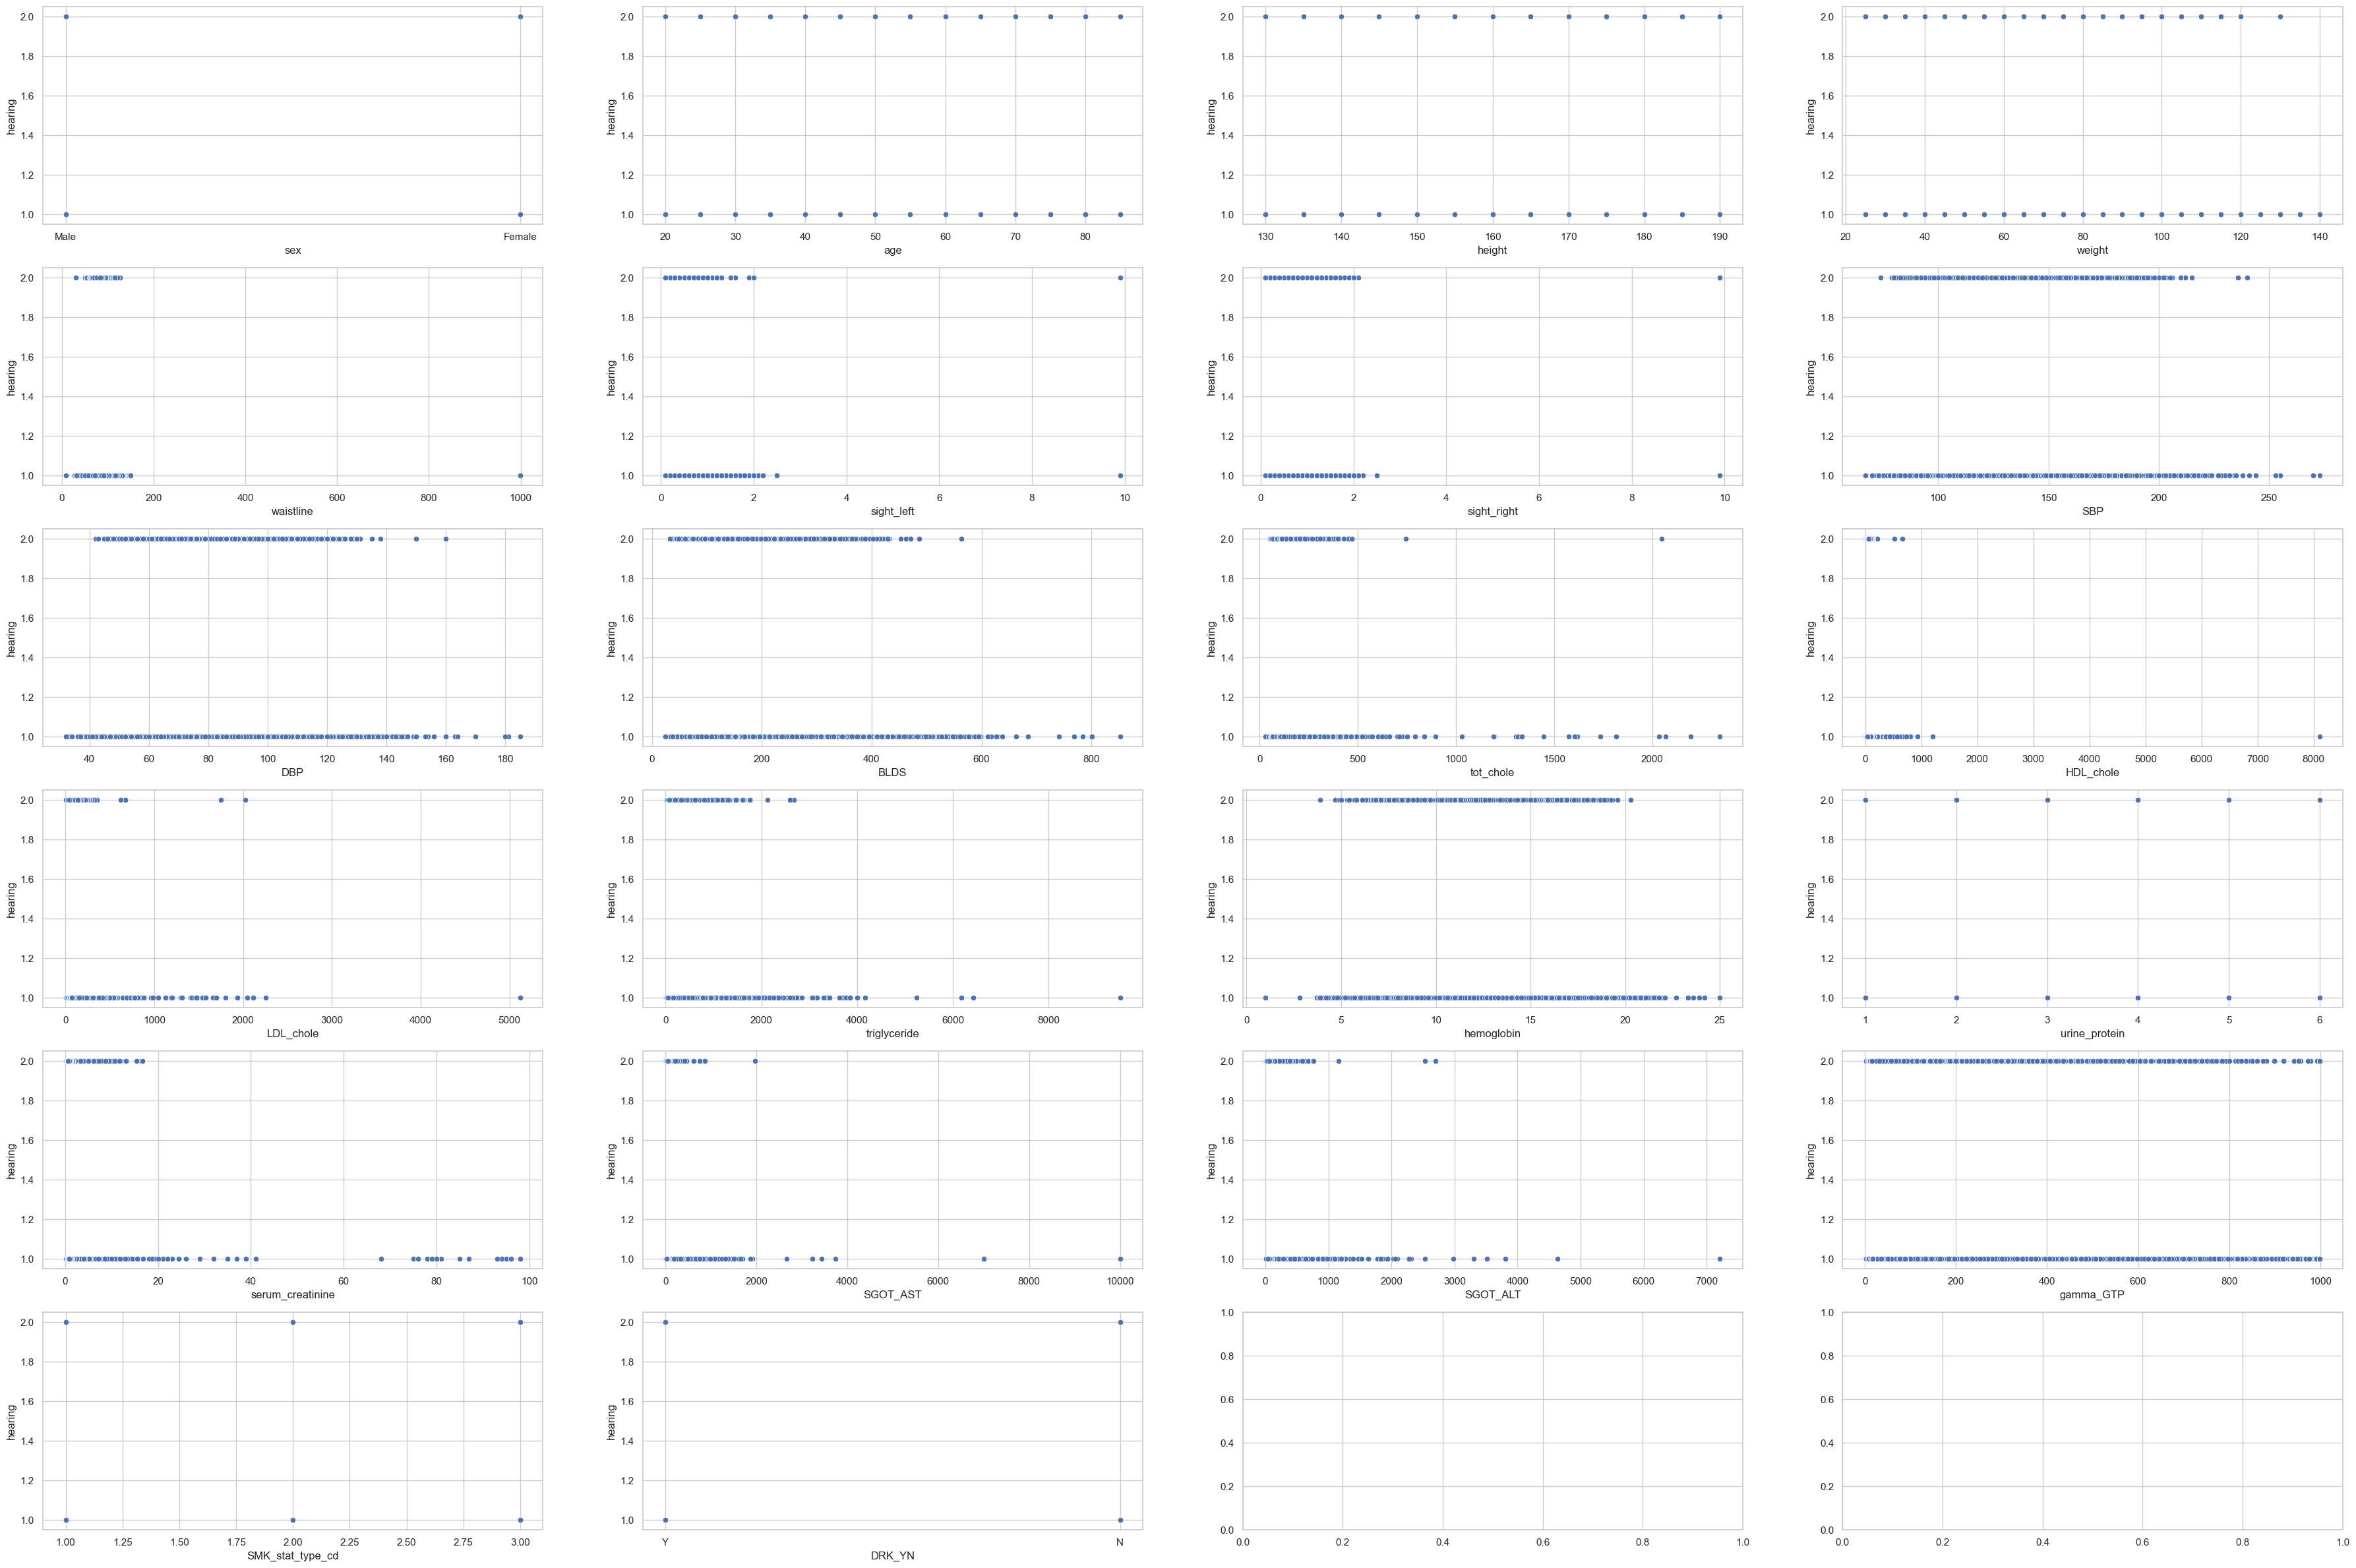

In [17]:
X = df.drop('hearing',axis='columns')
fig, ax=plt.subplots(6,4,figsize=(45,30))
sns.set_theme(style="whitegrid")
count=0
for axid, col in enumerate(X.columns):
    
    sns.scatterplot(x=X[col], y=df['hearing'],ax = ax[count,axid%4])
    if axid%4==3:
        count = count+1

Above given are the scatter plots with remaining 22 columns. The most important result derived from the above scatterplot is that hearing is not linearly dependent on any one column(no direct correlation), on linear separation can be derived.

[Text(0, 0, '946842'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '44504')]

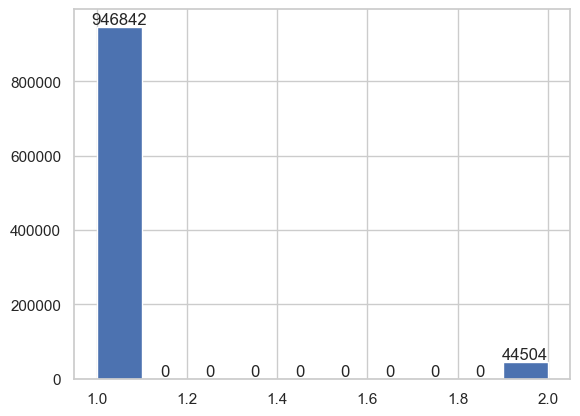

In [18]:
counts, edges, bars = plt.hist(df['hearing'])
plt.bar_label(bars)

The above barplot of hearing shows that most of the values are normal(946842), with only few as abnormal(44504). There are only two values in hearing column 1 and 2.

In [19]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
hearing             0
dtype: int64

There are not any null values in our dataset, so it doesn't require pre-processing in that aspect. 

***Data Preprocessing***
---

In [20]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
arr = enc.fit_transform(df[['sex','DRK_YN']]).toarray()
labels = np.array(enc.categories_).ravel()
features = pd.DataFrame(arr,columns = labels)
df = df.join(features)

Here, I have encoded the 2 required columns, sex(male,female) and DRK_YN(Y,N) using one hot encoder. So, 4 new columns can be seen below, added at the last with title Female, Male, N, y, one for each class.

In [21]:
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,...,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,hearing,Female,Male,N,Y
0,Male,35,170,75,90.0,1.0,1.0,120.0,80.0,99.0,...,21.0,35.0,40.0,1.0,Y,1,0.0,1.0,0.0,1.0
1,Male,30,180,80,89.0,0.9,1.2,130.0,82.0,106.0,...,20.0,36.0,27.0,3.0,N,1,0.0,1.0,1.0,0.0
2,Male,40,165,75,91.0,1.2,1.5,120.0,70.0,98.0,...,47.0,32.0,68.0,1.0,N,1,0.0,1.0,1.0,0.0
3,Male,50,175,80,91.0,1.5,1.2,145.0,87.0,95.0,...,29.0,34.0,18.0,1.0,N,1,0.0,1.0,1.0,0.0
4,Male,50,165,60,80.0,1.0,1.2,138.0,82.0,101.0,...,19.0,12.0,25.0,1.0,N,1,0.0,1.0,1.0,0.0
5,Male,50,165,55,75.0,1.2,1.5,142.0,92.0,99.0,...,29.0,40.0,37.0,3.0,Y,1,0.0,1.0,0.0,1.0
6,Female,45,150,55,69.0,0.5,0.4,101.0,58.0,89.0,...,19.0,12.0,12.0,1.0,N,1,1.0,0.0,1.0,0.0
7,Male,35,175,65,84.2,1.2,1.0,132.0,80.0,94.0,...,18.0,18.0,35.0,3.0,Y,1,0.0,1.0,0.0,1.0
8,Male,55,170,75,84.0,1.2,0.9,145.0,85.0,104.0,...,32.0,23.0,26.0,1.0,Y,1,0.0,1.0,0.0,1.0
9,Male,40,175,75,82.0,1.5,1.5,132.0,105.0,100.0,...,21.0,38.0,16.0,2.0,Y,1,0.0,1.0,0.0,1.0


In [22]:
df = df.drop(['sex','DRK_YN'],axis=1)
df.head()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,...,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,hearing,Female,Male,N,Y
0,35,170,75,90.0,1.0,1.0,120.0,80.0,99.0,193.0,...,1.0,21.0,35.0,40.0,1.0,1,0.0,1.0,0.0,1.0
1,30,180,80,89.0,0.9,1.2,130.0,82.0,106.0,228.0,...,0.9,20.0,36.0,27.0,3.0,1,0.0,1.0,1.0,0.0
2,40,165,75,91.0,1.2,1.5,120.0,70.0,98.0,136.0,...,0.9,47.0,32.0,68.0,1.0,1,0.0,1.0,1.0,0.0
3,50,175,80,91.0,1.5,1.2,145.0,87.0,95.0,201.0,...,1.1,29.0,34.0,18.0,1.0,1,0.0,1.0,1.0,0.0
4,50,165,60,80.0,1.0,1.2,138.0,82.0,101.0,199.0,...,0.8,19.0,12.0,25.0,1.0,1,0.0,1.0,1.0,0.0


In [23]:
def remove_outliers_iqr(dataframe, columns, lower_bound_factor=1.5, upper_bound_factor=1.5):
   
    trimmed_dataframe = dataframe.copy()
    
    for column in columns:
        Q1 = trimmed_dataframe[column].quantile(0.25)
        Q3 = trimmed_dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - lower_bound_factor * IQR
        upper_bound = Q3 + upper_bound_factor * IQR

        trimmed_dataframe = trimmed_dataframe[(trimmed_dataframe[column] >= lower_bound) & (trimmed_dataframe[column] <= upper_bound)]

    return trimmed_dataframe

df = remove_outliers_iqr(df, numerical_columns)

Here, I have removed the outliers from the above listed numerical columns.

In [24]:
df.shape

(631060, 25)

In [25]:
df.columns

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'hearing',
       'Female', 'Male', 'N', 'Y'],
      dtype='object')

In [26]:
X=df.drop('hearing',axis='columns')
y=df['hearing']

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
r = RandomOverSampler()
Xs, ys = r.fit_resample(X, y)
print(Counter(ys))
Xs.shape

Counter({1: 604268, 2: 604268})


(1208536, 24)

In our dataset, our prediction column Hearing has one sided values,(1 as major and 2 as minor) as seen on histogram above. So, to overcome this we have used RandomOverSampler, which duplicates the rows having hearing values as 2.

So, our size of the dataset is increased to 12 lakhs, and the hearing columns now have equal values of both 1 and 2, which is 6 lakhs, as shown in the histogram below.

[Text(0, 0, '604268'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '604268')]

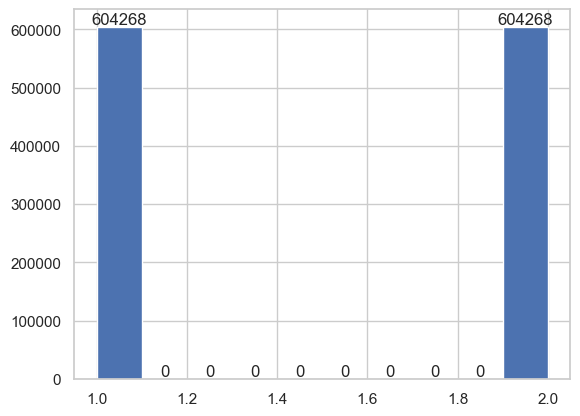

In [27]:
counts, edges, bars = plt.hist(ys)
plt.bar_label(bars)

***Model Training***
---

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, random_state=42, test_size=0.20, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((966828, 24), (241708, 24), (966828,), (241708,))

In [30]:
from sklearn.preprocessing import StandardScaler
size_scaler = StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from tensorflow import keras
import keras.layers as tfl

In [32]:
# model_dict = {
#     'LogisticRegression': {"model": LogisticRegression(), "params": {}},
#     'KNeighborsClassifier': {"model": KNeighborsClassifier(),
#                      "params": {'n_neighbors': [3,4,5], 'p': [1,2,3]}},
#     'SVC': {"model": SVC(random_state=42,gamma="auto"), "params": {'C': [1,3,5], 'kernel': ['linear','poly'], 
#                 'degree': [2,3], 'coef0': [0,1,2]}},
#     'RandomForestClassifier': {"model": RandomForestClassifier(random_state=42),
#                       "params": {'criterion': ["gini","entropy"]}}
# }

In [33]:
# def eval_models():
#     model_results = pd.DataFrame()
#     model_results['Test_Accuracy'] = None
#     model_results['Test_Precision'] = None
#     model_results['Test_Recall'] = None
#     model_results['Test_F1_Score'] = None
#     model_results['best_params'] = None

#     best_cls_model_ours = None
#     best_test_score = math.inf

#     for model_name, cls_model in model_dict.items():
#         classifier = GridSearchCV(cls_model['model'], cls_model['params'], n_jobs=20, verbose=0)
#         classifier.fit(X_train_scaled, list(y_train))
#         best_model = classifier.best_estimator_

#         y_train_predicted = best_model.predict(X_train_scaled)
#         # print(model_name, train_rmse, classifier.best_params_)

#         y_predicted = best_model.predict(X_test_scaled)
#         test_accuracy = metrics.accuracy_score(y_test, y_predicted)
#         test_precision = metrics.precision_score(y_test, y_predicted)
#         test_recall = metrics.recall_score(y_test, y_predicted)
#         test_f1 = metrics.f1_score(y_test, y_predicted) 

#         if test_f1 > best_test_score:
#             best_test_score = test_f1
#             best_cls_model_ours = best_model

#         model_results.loc[model_name, ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1_Score', 'best_params']] = [test_accuracy, test_precision, test_recall, test_f1, classifier.best_params_]

#     print("Best model: ", best_cls_model_ours)

#     return model_results

In [ ]:
# model_results = eval_models()

In [54]:
params = {}
classifier = GridSearchCV(LogisticRegression(),params, n_jobs=20, verbose=0, cv=2)
classifier.fit(X_train_scaled, list(y_train))
best_model = classifier.best_estimator_
y_predicted = best_model.predict(X_test_scaled)
test_accuracy = metrics.accuracy_score(y_test, y_predicted)
test_precision = metrics.precision_score(y_test, y_predicted)
test_recall = metrics.recall_score(y_test, y_predicted)
test_f1 = metrics.f1_score(y_test, y_predicted)

print('Test_Accuracy: ',test_accuracy)
print('Test_Precision: ',test_precision)
print('Test_Recall: ',test_recall)
print('Test_F1_Score: ',test_f1)
print('best_params: ',classifier.best_params_)


Test_Accuracy:  0.7403395832988565
Test_Precision:  0.7477733900883806
Test_Recall:  0.7245854660504564
Test_F1_Score:  0.7359968367741827
best_params:  {}


Here, linear classification does not perform well on our data set.

In [ ]:
# params = {}
# classifier = GridSearchCV(KNeighborsClassifier(),params, n_jobs=20, verbose=0, cv=2)
# classifier.fit(X_train_scaled, list(y_train))
# best_model = classifier.best_estimator_
# y_predicted = best_model.predict(X_test_scaled)
# test_accuracy = metrics.accuracy_score(y_test, y_predicted)
# test_precision = metrics.precision_score(y_test, y_predicted)
# test_recall = metrics.recall_score(y_test, y_predicted)
# test_f1 = metrics.f1_score(y_test, y_predicted)

# print('Test_Accuracy: ',test_accuracy)
# print('Test_Precision: ',test_precision)
# print('Test_Recall: ',test_recall)
# print('Test_F1_Score: ',test_f1)
# print('best_params: ',classifier.best_params_)

In [ ]:
# params = {}
# classifier = GridSearchCV(SVC(random_state=42,gamma="auto"),params, n_jobs=20, verbose=0, cv=2)
# classifier.fit(X_train_scaled, list(y_train))
# best_model = classifier.best_estimator_
# y_predicted = best_model.predict(X_test_scaled)
# test_accuracy = metrics.accuracy_score(y_test, y_predicted)
# test_precision = metrics.precision_score(y_test, y_predicted)
# test_recall = metrics.recall_score(y_test, y_predicted)
# test_f1 = metrics.f1_score(y_test, y_predicted)

# print('Test_Accuracy: ',test_accuracy)
# print('Test_Precision: ',test_precision)
# print('Test_Recall: ',test_recall)
# print('Test_F1_Score: ',test_f1)
# print('best_params: ',classifier.best_params_)

In [38]:
params = {'criterion': ["gini","entropy"]}
classifier = GridSearchCV(RandomForestClassifier(random_state=42),params, n_jobs=20, verbose=0, cv=2)
classifier.fit(X_train_scaled, list(y_train))
best_model = classifier.best_estimator_
y_predicted = best_model.predict(X_test_scaled)
test_accuracy = metrics.accuracy_score(y_test, y_predicted)
test_precision = metrics.precision_score(y_test, y_predicted)
test_recall = metrics.recall_score(y_test, y_predicted)
test_f1 = metrics.f1_score(y_test, y_predicted)

print('Test_Accuracy: ',test_accuracy)
print('Test_Precision: ',test_precision)
print('Test_Recall: ',test_recall)
print('Test_F1_Score: ',test_f1)
print('best_params: ',classifier.best_params_)

Test_Accuracy:  0.9995407681996459
Test_Precision:  1.0
Test_Recall:  0.9990806539780351
Test_F1_Score:  0.9995401155925674
best_params:  {'criterion': 'gini'}


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

Here, the label encoding is done because the models XGBoost and Neural Networks are prone to encoding. The classes must start with value 0. So, instead of classes 1 and 2 in our case, encoded classes are 0 and 1, which are used in further models.

In [52]:
params = {}
classifier = GridSearchCV(xgb.XGBClassifier(),params, n_jobs=20, verbose=0, cv=2)
classifier.fit(X_train_scaled, list(y_train_encoded))
best_model = classifier.best_estimator_
y_predicted = best_model.predict(X_test_scaled)
test_accuracy = metrics.accuracy_score(y_test_encoded, y_predicted)
test_precision = metrics.precision_score(y_test_encoded, y_predicted,average='micro')
test_recall = metrics.recall_score(y_test_encoded, y_predicted,average='micro')
test_f1 = metrics.f1_score(y_test_encoded, y_predicted,average='micro')

print('Test_Accuracy: ',test_accuracy)
print('Test_Precision: ',test_precision)
print('Test_Recall: ',test_recall)
print('Test_F1_Score: ',test_f1)
print('best_params: ',classifier.best_params_)

Test_Accuracy:  0.7803382593873599
Test_Precision:  0.7803382593873599
Test_Recall:  0.7803382593873599
Test_F1_Score:  0.7803382593873599
best_params:  {}


In [49]:
inputs=tfl.Input(shape=(24,))
x=tfl.Dense(64,activation='relu')(inputs)
x=tfl.Dense(32,activation='relu')(x)
x=tfl.Dense(16,activation='relu')(x)
outputs=tfl.Dense(1,activation='sigmoid')(x)
classifier=keras.Model(inputs,outputs)

classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

classifier.fit(X_train_scaled, y_train_encoded,epochs=10)

Epoch 1/10
30214/30214 [==============================] - 35s 1ms/step - loss: 0.5261 - accuracy: 0.7410
Epoch 2/10
30214/30214 [==============================] - 38s 1ms/step - loss: 0.5162 - accuracy: 0.7467
Epoch 3/10
30214/30214 [==============================] - 34s 1ms/step - loss: 0.5054 - accuracy: 0.7521
Epoch 4/10
30214/30214 [==============================] - 34s 1ms/step - loss: 0.4972 - accuracy: 0.7563
Epoch 5/10
30214/30214 [==============================] - 35s 1ms/step - loss: 0.4913 - accuracy: 0.7597
Epoch 6/10
30214/30214 [==============================] - 34s 1ms/step - loss: 0.4870 - accuracy: 0.7617
Epoch 7/10
30214/30214 [==============================] - 34s 1ms/step - loss: 0.4831 - accuracy: 0.7638
Epoch 8/10
30214/30214 [==============================] - 37s 1ms/step - loss: 0.4802 - accuracy: 0.7654
Epoch 9/10
30214/30214 [==============================] - 38s 1ms/step - loss: 0.4780 - accuracy: 0.7664
Epoch 10/10
30214/30214 [==============================

Here, it can be seen above that neural networks does not perform well on structured data. It is generally used on un-structured data(images,etc.).

***The best classification model in our case is Random Forest Classification with criterion gini. This model achieves 99% accuracy, recall and F1 score and 100% precision.***